In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [86]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [87]:
from imports_for_ML import load_images

Load photos

In [153]:
import os

img_dir = r'/Users/kubamilcarz/Desktop/Python/Project/train'
images = os.listdir(img_dir)
full_images = [os.path.join(img_dir, img) for img in images]

In [154]:
len(full_images) # check if we have 25000 photos

25000

In [155]:
# Splitting data into test & train
X, y = load_images(img_dir, n_images=10000, resize=(50, 50))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [200]:
# split data into train, validate, test
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.1)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3)

In [218]:
# Load packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [246]:
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu'),
    Conv2D(16,(3,3), activation = 'relu'),
    MaxPooling2D((3,3)),
    
    Conv2D(16,(3,3), activation = 'relu'),
    Conv2D(16,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(16,(3,3), activation = 'relu'),
    MaxPooling2D((3,3)),
    
    Flatten(input_shape = (5, 5,32)),
    Dense(64, activation = 'relu'),
    
    Dense(1, activation='sigmoid')
])

In [247]:
model.compile(loss = 'binary_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])

In [248]:
history = model.fit(X_train, y_train, epochs = 17, validation_data=(X_val, y_val))

Epoch 1/17
282/282 [==============================] - 6s 19ms/step - loss: 0.7137 - accuracy: 0.5369 - val_loss: 0.6794 - val_accuracy: 0.5829
Epoch 2/17
282/282 [==============================] - 5s 19ms/step - loss: 0.6715 - accuracy: 0.5828 - val_loss: 0.6623 - val_accuracy: 0.6000
Epoch 3/17
282/282 [==============================] - 5s 19ms/step - loss: 0.6615 - accuracy: 0.6050 - val_loss: 0.6491 - val_accuracy: 0.6214
Epoch 4/17
282/282 [==============================] - 5s 19ms/step - loss: 0.6335 - accuracy: 0.6419 - val_loss: 0.6250 - val_accuracy: 0.6486
Epoch 5/17
282/282 [==============================] - 5s 19ms/step - loss: 0.6046 - accuracy: 0.6756 - val_loss: 0.5889 - val_accuracy: 0.6886
Epoch 6/17
282/282 [==============================] - 5s 19ms/step - loss: 0.5665 - accuracy: 0.7073 - val_loss: 0.5800 - val_accuracy: 0.7057
Epoch 7/17
282/282 [==============================] - 5s 19ms/step - loss: 0.5409 - accuracy: 0.7277 - val_loss: 0.5894 - val_accuracy: 0.7029

In [249]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 2s 7ms/step - loss: 0.3593 - accuracy: 0.8393
0.8393333554267883

Accuracy on the test data:
10/10 [==============================] - 0s 7ms/step - loss: 0.5343 - accuracy: 0.7400
0.7400000095367432


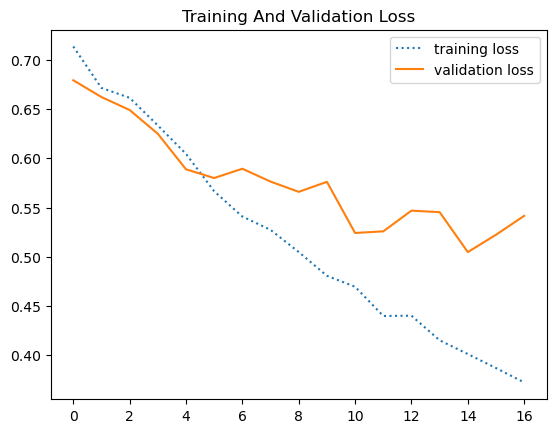

In [259]:
# 3. visualization
plt.plot(history.history['loss'], linestyle=':', label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training And Validation Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 53ms/step


array([[0.18233907]], dtype=float32)

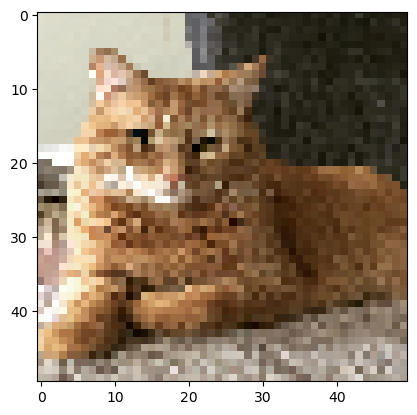

In [253]:
# 6. I don't have dogs or cats, so let's treat these two as my own :)

# test on an unseen image of a cat
img = load_img(r'/Users/kubamilcarz/Downloads/cat_predict', target_size=(50, 50))
plt.imshow(img)
img_array = img_to_array(img)
model.predict(img_array.reshape((1, 50, 50, 3))) # 0.18 sure it's a cat

1/1 [==============================] - 0s 19ms/step


array([[0.88903964]], dtype=float32)

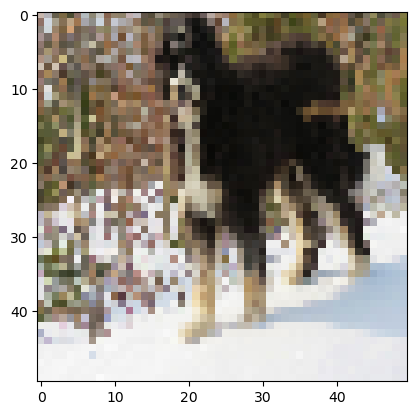

In [254]:
# test on an unseen image of a dog
img = load_img(r'/Users/kubamilcarz/Downloads/dog_predict', target_size=(50, 50))
plt.imshow(img)
img_array = img_to_array(img)
model.predict(img_array.reshape((1, 50, 50, 3))) # 0.88 strongly sure a dog

In [255]:
# 7. save model
import keras
keras.models.save_model(model=model, filepath=r'/Users/kubamilcarz/Desktop/Jakub_Milcarz_46409_Model_final', 
                           save_format='h5')

In [256]:
# check the imported model
from keras.models import load_model

model_imported = load_model((r'/Users/kubamilcarz/Desktop/Jakub_Milcarz_46409_Model_final'))
model_imported.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 48, 48, 16)        448       
                                                                 
 conv2d_136 (Conv2D)         (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_137 (Conv2D)         (None, 13, 13, 16)        2320      
                                                                 
 conv2d_138 (Conv2D)         (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                

In [257]:
# check against our model
model.summary() # same thing -> importing works

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 48, 48, 16)        448       
                                                                 
 conv2d_136 (Conv2D)         (None, 46, 46, 16)        2320      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_137 (Conv2D)         (None, 13, 13, 16)        2320      
                                                                 
 conv2d_138 (Conv2D)         (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                